## Assignment 04
## Mani Kanta Yaswanth Jalagadugu U48993625

### Importing Libraries

In [246]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Loading dataset using pd.read_csv


In [247]:
df=pd.read_csv('C:/Users/Mani Kanta Yaswanth/Downloads/sample.csv')

In [248]:
print(df.head())

         x        y
0  55.3846  97.1795
1  51.5385  96.0256
2  46.1538  94.4872
3  42.8205  91.4103
4  40.7692  88.3333


### Creating two dataframes x and y

In [249]:
X=df[['x']]
y=df[['y']]

### Creating a Scatterplot for x and y dataframes 

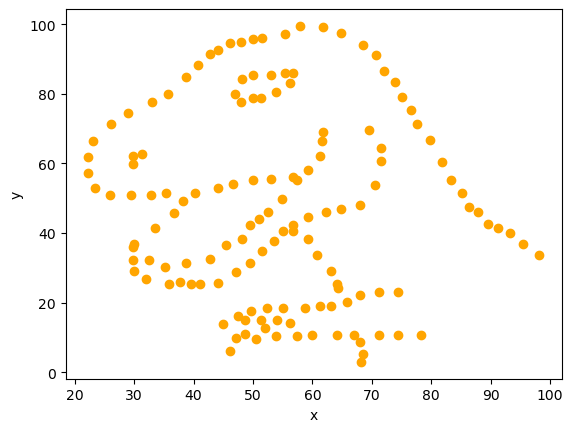

In [250]:
fig=plt.figure()
f=fig.add_subplot()
f.scatter(X,y,color='orange')
f.set_xlabel('x')
f.set_ylabel('y')
plt.show()

### Creating the linear regression model

In [251]:
lin_reg=LinearRegression().fit(X,y)

### Representing the Linear Regression model using Scatterplot

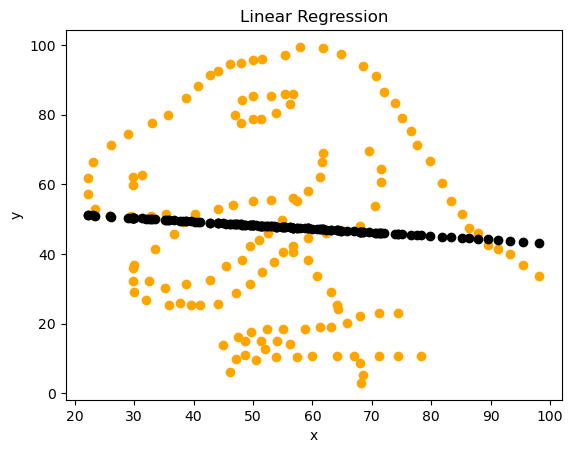

In [252]:
fig=plt.figure() 
f=fig.add_subplot()
f.scatter(X,y,color='orange')
f.scatter(X,lin_reg.predict(X),color='black')
f.set_title('Linear Regression')
f.set_xlabel('x')
f.set_ylabel('y')
plt.show()

### Determining the intercept and coefficient values

In [253]:
b0=lin_reg.intercept_[0]
b1=lin_reg.coef_[0][0]

### Linear regression equation and R-squared score of the model

In [254]:
print("Y = {:.2f}+{:.2f}x".format(b0, b1))
print("R Square R^2: {:.3f}".format(lin_reg.score(X, y)))

Y = 53.45+-0.10x
R Square R^2: 0.004


### Determining the Mean squared error value

In [255]:
y_prd = lin_reg.predict(X)  
mse = mean_squared_error(y, y_prd)
print(f"MSE: {mse}")

MSE: 717.4122369529263


### KNN Regressor

In [256]:
knn_data= df[['x','y']]
knn_data

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
...,...,...
137,39.4872,25.3846
138,91.2821,41.5385
139,50.0000,95.7692
140,47.9487,95.0000


### Normalizing data using Min-Max scaling

In [257]:
knn_data=(knn_data - np.min(knn_data))/(np.max(knn_data)-np.min(knn_data))

C:\Users\Mani Kanta Yaswanth\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Mani Kanta Yaswanth\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Mani Kanta Yaswanth\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [258]:
knn_ind=knn_data.drop('y',axis=1)
knn_dep=knn_data['y']

In [259]:
ind_train,ind_test,dep_train,dep_test = train_test_split(knn_ind,knn_dep,test_size=0.3,random_state=20)

### Performing Regression

In [260]:
knn_model=KNeighborsRegressor().fit(ind_train,dep_train)
prd_val = knn_model.predict(ind_test)
prd_val

array([0.67091616, 0.58247021, 0.5131474 , 0.18087665, 0.49083651,
       0.53705164, 0.5131474 , 0.34262952, 0.43745014, 0.40743703,
       0.54608244, 0.22231089, 0.43745014, 0.41035856, 0.3171313 ,
       0.34262952, 0.3697213 , 0.58884466, 0.54608244, 0.24063767,
       0.3697213 , 0.35298829, 0.51792829, 0.35059774, 0.34262952,
       0.40079678, 0.49083651, 0.41992034, 0.3219124 , 0.53705164,
       0.54608244, 0.53227096, 0.41035856, 0.40743703, 0.3219124 ,
       0.34873859, 0.48950875, 0.47516607, 0.4478087 , 0.43745014,
       0.34528546, 0.45498014, 0.67091616])

In [261]:
predict_df=pd.DataFrame({'Actual':dep_test,'Predicted':prd_val})
predict_df.shape

(43, 2)

### z-score normalization


In [262]:
predict_df = (predict_df * np.std(df.y) + (np.mean(df.y)))

In [263]:
predict_df.head()

,Actual,Predicted
98,58.311762,65.839906
37,55.424554,63.465982
85,69.005159,61.605331
129,49.970927,52.687053
91,61.305928,61.006498


In [264]:
r2_score(predict_df.Predicted, predict_df.Actual)

-8.774400560123473

In [265]:
knn_model=KNeighborsRegressor(n_neighbors = 11).fit(X,y)
prd_val = knn_model.predict(X)

### Scatterplot for KNN Regression

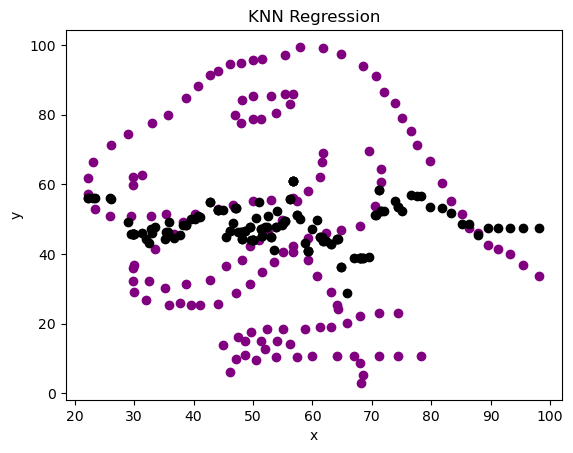

In [266]:
fig=plt.figure() 
f=fig.add_subplot()
f.scatter(X,y,color='purple')
f.scatter(X,knn_model.predict(X),color='black')
f.set_title('KNN Regression')
f.set_xlabel('x')
f.set_ylabel('y')
plt.show()

In [267]:
y_prd = knn_model.predict(X)  
mse = mean_squared_error(y, y_prd)
print(f"MSE: {mse}")

MSE: 718.9825204439098


### Summary



The x and y dataframes are used to train a linear regression model, with its fit and key parameters visualized. After standardizing the dataset with Min-Max scaling, a KNN regressor is trained. Predictions from this model are denormalized to their original scale and evaluated. Another KNN model with neighbors=11 is trained on the original data. Both models performances are comparable, as evidenced by similar MSE values.